# Leitura e visualização da imagem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = plt.imread('cameraman.tiff')
print('Objeto:', type(img))
print('Tipo de dado de cada pixel:', img.dtype)
print('Tamanho da imagem:', img.shape)
print('Valor máximo:', img.max())
print('Valor mínimo:', img.min())

Objeto: <class 'numpy.ndarray'>
Tipo de dado de cada pixel: uint8
Tamanho da imagem: (256, 256)
Valor máximo: 253
Valor mínimo: 7


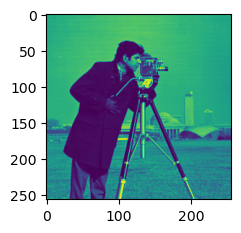

In [2]:
# Mostra a imagem. 
# Por padrão, o matplotlib faz um mapeamento dos valores 0 a 255 na imagem para 
# as cores do mapa de cores viridis (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
plt.imshow(img)

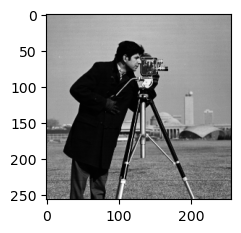

In [3]:
# Mostra a imagem utilizando mapa de cores nível de cinza
plt.imshow(img, cmap='gray')

In [4]:
# Imprime a primeira linha da imagem
print(img[0])

[156 159 158 155 158 156 159 158 157 158 158 159 160 160 160 158 163 161
 162 160 164 160 165 163 161 163 161 164 165 162 161 165 165 164 166 165
 164 166 167 165 165 164 170 166 167 167 170 168 169 166 169 167 170 169
 169 171 169 171 169 171 170 169 173 173 172 171 173 176 174 176 180 179
 178 178 181 181 181 177 180 178 179 180 180 180 178 184 181 182 183 182
 183 181 182 183 182 185 184 181 181 183 184 183 184 183 186 186 187 184
 183 185 185 185 182 183 186 182 184 187 185 188 185 185 186 184 184 182
 186 186 185 181 186 182 182 185 183 180 181 182 181 185 182 186 182 181
 183 182 181 181 181 179 181 177 180 181 178 178 180 179 180 177 179 180
 178 176 178 174 177 178 173 177 177 176 172 172 172 176 174 177 173 173
 169 172 169 171 167 167 166 167 168 168 168 168 169 166 169 165 166 166
 166 164 166 169 166 168 166 165 168 167 168 165 166 166 164 163 164 159
 164 164 158 162 162 162 161 159 161 161 159 159 160 155 155 154 155 153
 156 155 158 156 155 155 156 154 151 156 155 152 15

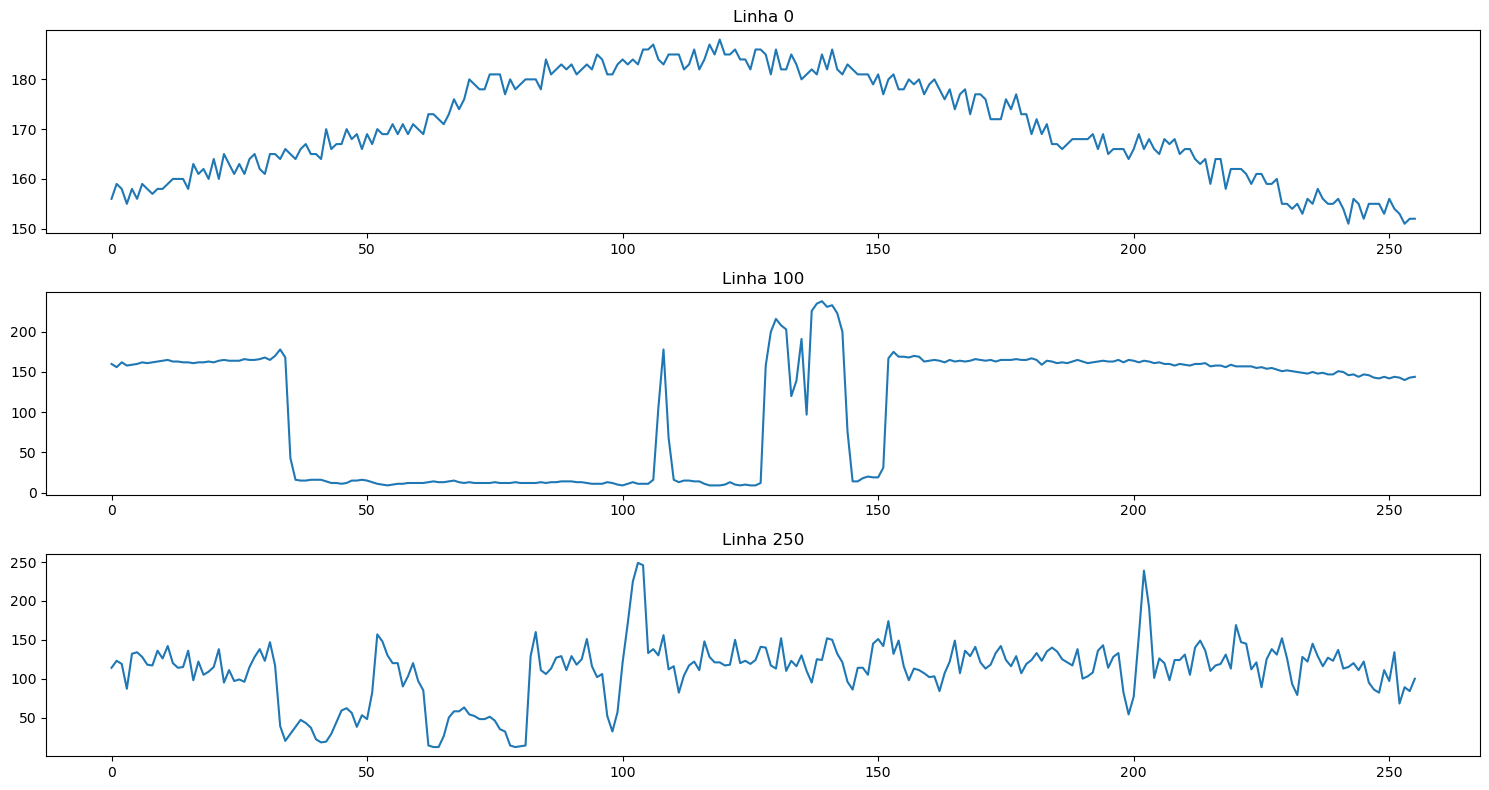

In [5]:
# Plota os valores de três linhas diferentes da imagem
plt.figure(figsize=[15, 8])
plt.subplot(3, 1, 1)
plt.plot(img[0])
plt.title('Linha 0')
plt.subplot(3, 1, 2)
plt.plot(img[100])
plt.title('Linha 100')
plt.subplot(3, 1, 3)
plt.plot(img[250])
plt.title('Linha 250')
plt.tight_layout()

# Transformações de imagens

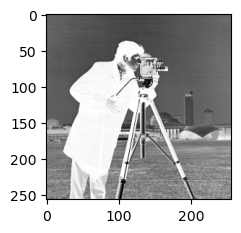

In [6]:
# Negativo, utilizando loops Python
num_linhas, num_cols = img.shape
img_neg = np.zeros((num_linhas, num_cols), dtype=np.uint8)
for row in range(num_linhas):
    for col in range(num_cols):
        img_neg[row, col] = 255 - img[row, col]
plt.imshow(img_neg, 'gray')

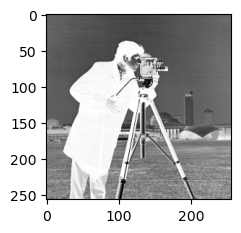

In [7]:
# Negativo, utilizando numpy
img_neg_np = 255 - img
plt.imshow(img_neg_np, 'gray')

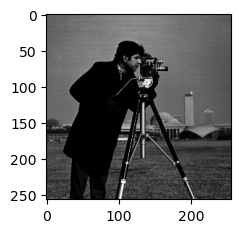

In [8]:
# Lei de potência (gamma)
gamma = 2.
c = 255/255**gamma    # Constante multiplicativa para normalizar os valores
img_gamma = np.zeros((num_linhas, num_cols), dtype=np.uint8)
for row in range(num_linhas):
    for col in range(num_cols):
        img_gamma[row, col] = int(c*img[row, col]**gamma)
plt.imshow(img_gamma, 'gray')

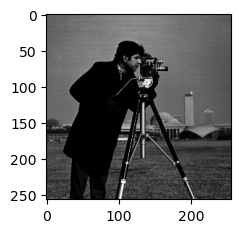

In [9]:
# Lei de potência (gamma) utilizando o numpy
img_gamma = c*img**gamma
img_gamma = img_gamma.astype(np.uint8)
plt.imshow(img_gamma, 'gray')

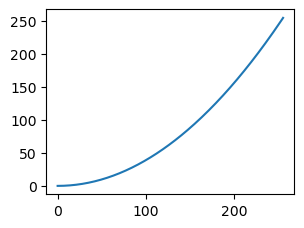

In [10]:
# Visualização da função de transformação utilizada
x = np.arange(0, 256)
y = c*x**gamma
plt.plot(x, y)

## Transformação utilizando lookup table

In [11]:
# Implementação de uma lookup table logarítmica
c = 255/np.log(256)
lookup_table = np.zeros(256, dtype=np.uint8)
for value in range(0, 256):
    lookup_table[value] = c*np.log(1+value)
print(lookup_table)

[  0  31  50  63  74  82  89  95 101 105 110 114 117 121 124 127 130 132
 135 137 140 142 144 146 148 149 151 153 154 156 157 159 160 162 163 164
 166 167 168 169 170 171 172 174 175 176 177 178 178 179 180 181 182 183
 184 185 185 186 187 188 189 189 190 191 191 192 193 194 194 195 196 196
 197 197 198 199 199 200 200 201 202 202 203 203 204 204 205 205 206 206
 207 207 208 208 209 209 210 210 211 211 212 212 213 213 214 214 214 215
 215 216 216 216 217 217 218 218 218 219 219 220 220 220 221 221 222 222
 222 223 223 223 224 224 224 225 225 225 226 226 226 227 227 227 228 228
 228 229 229 229 230 230 230 231 231 231 231 232 232 232 233 233 233 233
 234 234 234 235 235 235 235 236 236 236 236 237 237 237 238 238 238 238
 239 239 239 239 240 240 240 240 241 241 241 241 242 242 242 242 242 243
 243 243 243 244 244 244 244 245 245 245 245 245 246 246 246 246 246 247
 247 247 247 248 248 248 248 248 249 249 249 249 249 250 250 250 250 250
 251 251 251 251 251 252 252 252 252 252 252 253 25

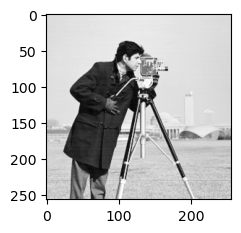

In [12]:
# Transformação de imagem utilizando lookup table
img_log = np.zeros((num_linhas, num_cols), dtype=np.uint8)
for row in range(num_linhas):
    for col in range(num_cols):
        img_log[row, col] = lookup_table[img[row, col]]
plt.imshow(img_log, 'gray')

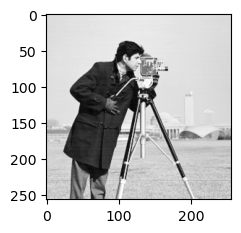

In [13]:
# Transformação usando indexação do numpy
img_log = lookup_table[img.flatten()].reshape(img.shape)
plt.imshow(img_log, 'gray')

Text(0.5, 1.0, 'Imagem após aplicação do logaritmo')

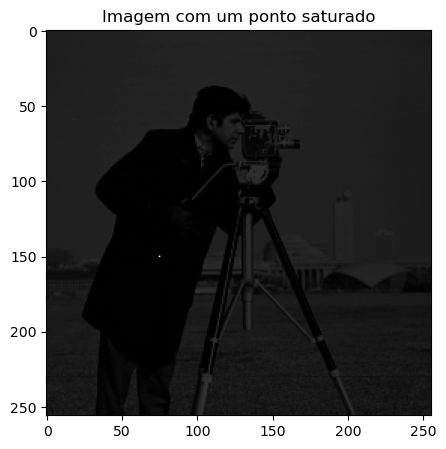

<Figure size 320x240 with 0 Axes>

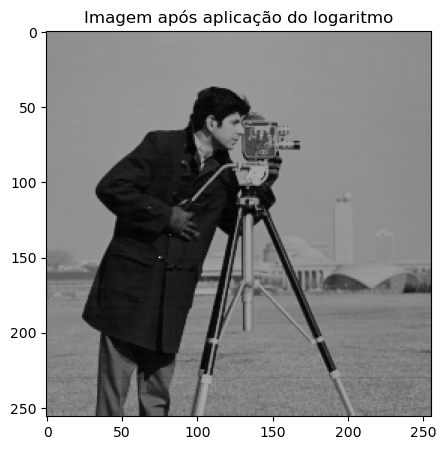

In [16]:
# Simulando uma situação na qual o logaritmo seria util
img_sim = 0.2*img
img_sim[150, 75] = 255
plt.figure(figsize=[5, 5])
plt.imshow(img_sim, 'gray')
plt.title("Imagem com um ponto saturado")
img_sim_log = c*np.log(1+img_sim)
plt.figure()
plt.figure(figsize=[5, 5])
plt.imshow(img_sim_log, 'gray')
plt.title("Imagem após aplicação do logaritmo")